In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import h5py 
import datetime
import glob
import copy
from calendar import monthrange
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

import sys
sys.path.append('d:\\gitCCA\\cca-jupyter\\py\\')
import mapper_functions as mpf

In [15]:
### BEGIN: rango del mapa
#latmin = 18.3
#latmax = 20.5
#lonmin = -100.5
#lonmax = -97.7
latmin = 19.1
latmax = 19.8
lonmin = -99.5
lonmax = -98.7
#latmin = 20
#latmax = 21
#lonmin = -104
#lonmax = -103
### END: rango del mapa

### BEGIN: parametros para funciones del modulo mapper_functions
nx=50
ny=50
footprintradio = 5.0/110.0
pathname = 'D:\\CCA\\NASAGESDISC\\OCO3\\MEXICO\\mexico_oco3_lite_2020*.h5'
targetname1 = 'fossil0036'
targetname2 = 'volcano0002'
name = '/xco2'
psurf = '/Retrieval/psurf'
psurfmatname = 'Psurf_50x50_5km_SmallGrid.npz'
dsetpath = 'd:\\gitCCA\\cca-jupyter\\altzrefavgoff.npz'
daylistpath = 'd:\\gitCCA\\cca-jupyter\\alldatadays.npz'
### END: parametros para funciones del modulo

### BEGIN: parametros para mappernxm 
### NOTA: Las matrices, titulos, y niveles se definen por el usuario justo antes de cambiar la funcion
fontsize = 20
ticksize = 14
rows = 1
cols = 1
figname = 'd:\\gitCCA\\cca-jupyter\\figures\\3x3\\xCO2_ML_PsurfComp_B2_Small.png'
savefig = 0 # 0 for no 1 for yes
cbarname = 'ppm'
### END: parametros para mappernxm

### BEGIN: verbosity and testing, 0=no, 1=yes
testwithdset = 0
verbcompile = 1
verbdata = 1
verbmatrix = 1
### END: verbosity and testing

### BEGIN: legacy variables
#paltz = 748.2134 #extended
#paltz = #no hay paltz en la matriz de psurf para el rango pequenyo
#xco2altz = 412.4
#psurfaltz = 633.72
### END: legacy variables


In [12]:
to=datetime.datetime.utcfromtimestamp(0.0)

lats=latmin+(latmax-latmin)*np.arange(ny)/(ny-1)
lons=lonmin+(lonmax-lonmin)*np.arange(nx)/(nx-1)


lista=glob.glob(pathname)
#print(lista)

#data = mpf.compilealldata(lats,lons,lista,footprintradio,verbcompile)
data = mpf.compilealldatat(lats,lons,lista,footprintradio,verbcompile)
#data = mpf.compilealldatatarget(lats,lons,lista,footprintradio,targetname1,targetname2,verbcompile)
#data = mpf.compilealldatatargett(lats,lons,lista,footprintradio,targetname1,targetname2,verbcompile)

print(data.shape)


Data shape for current loop is:  (77,)
Data shape for current loop is:  (133,)
Data shape for current loop is:  (237,)
Data shape for current loop is:  (475,)
Data shape for current loop is:  (967,)
Data shape for current loop is:  (1257,)
Data shape for current loop is:  (1706,)
Data shape for current loop is:  (1984,)
Data shape for current loop is:  (2318,)
Data shape for current loop is:  (2552,)
Data shape for current loop is:  (2554,)
Data shape for current loop is:  (2559,)
Data shape for current loop is:  (2648,)
Data shape for current loop is:  (2696,)
Data shape for current loop is:  (2795,)
Data shape for current loop is:  (2898,)
Data shape for current loop is:  (2920,)
Data shape for current loop is:  (2942,)
Data shape for current loop is:  (3133,)
Data shape for current loop is:  (3355,)
Data shape for current loop is:  (3409,)
Data shape for current loop is:  (3523,)
Data shape for current loop is:  (3552,)
Data shape for current loop is:  (3594,)
(3594,)


In [13]:
daylist = np.load(daylistpath,'r')
dset = np.load(dsetpath,'r')
mset = np.load(psurfmatname,'r')
psurfmat = mset['matrix']
datos = mpf.datacorrection3_ml(daylist,dset,data,name,psurf,verbdata)
datac = mpf.matrixcorrection3_ml(daylist,dset,data,psurfmat,name,psurf,lats,lons,verbmatrix)

Datos seleccionados:
[412.91821289 412.6987915  412.57522583 ... 412.38046265 413.08029175
 412.85778809]
1590254646.6761427 [1.07906997e+08 1.07906997e+08 1.07906998e+08 ... 1.37621985e+08
 1.37621985e+08 1.37621985e+08]
original data
(3594,)
[412.91821289 412.6987915  412.57522583 ... 412.38046265 413.08029175
 412.85778809]
corrected
(3594,)
[426.53349336 425.4451092  423.85332698 ... 413.56366319 417.5954609
 416.40936466]
Datos seleccionados:
[412.91821289 412.6987915  412.57522583 ... 412.38046265 413.08029175
 412.85778809]
1590254646.6761427 [1.07906997e+08 1.07906997e+08 1.07906998e+08 ... 1.37621985e+08
 1.37621985e+08 1.37621985e+08]
-99.34017944335938 19.765535354614258
-99.35306122448979 19.757142857142856
735.4887084960938 410.2160830584148
x: 430.8666716992804 datacorr copy:  430.8666716992804 original data: 412.918212890625
-99.3279037475586 19.774951934814453
-99.33673469387755 19.771428571428572
709.2071533203125 410.2160830650631
x: 435.38512584149345 datacorr copy: 

778.0833129882812 410.92800371901075
x: 431.54601241692103 datacorr copy:  431.54601241692103 original data: 414.60687255859375
-99.03298950195312 19.43939208984375
-99.04285714285714 19.42857142857143
779.56005859375 410.9280037291192
x: 435.9408004732553 datacorr copy:  435.9408004732553 original data: 415.4299621582031
-99.00524139404297 19.423154830932617
-99.01020408163265 19.414285714285715
774.80224609375 410.92800378149826
x: 435.7201650626788 datacorr copy:  435.7201650626788 original data: 415.2654113769531
-99.01222229003906 19.43934440612793
-99.0265306122449 19.42857142857143
776.5924072265625 410.9280037865487
x: 434.07324938108684 datacorr copy:  434.07324938108684 original data: 415.02130126953125
-99.01927185058594 19.455596923828125
-99.0265306122449 19.442857142857143
776.5426025390625 410.9280037915992
x: 427.42480227101635 datacorr copy:  427.42480227101635 original data: 413.8446350097656
-99.26195526123047 19.10796356201172
-99.27142857142857 19.1
750.81994628906

x: 430.6180692305852 datacorr copy:  430.6180692305852 original data: 414.3726806640625
-98.97088623046875 19.390769958496094
-98.97755102040817 19.385714285714286
774.446533203125 410.9280038286461
x: 422.0215486145465 datacorr copy:  422.0215486145465 original data: 412.8646240234375
-98.97776794433594 19.407047271728516
-98.9938775510204 19.400000000000002
772.9264526367188 410.9280038336966
x: 431.99302404426203 datacorr copy:  431.99302404426203 original data: 414.5711669921875
-98.98456573486328 19.423118591308594
-98.9938775510204 19.414285714285715
771.6196899414062 410.9280038387471
x: 437.6703439591883 datacorr copy:  437.6703439591883 original data: 415.5155944824219
-98.99152374267578 19.439355850219727
-98.9938775510204 19.42857142857143
769.2059936523438 410.92800384379757
x: 438.1869563632264 datacorr copy:  438.1869563632264 original data: 415.5333557128906
-98.9985122680664 19.455543518066406
-99.01020408163265 19.442857142857143
774.3907470703125 410.92800384884805
x:

-99.43469387755103 19.200000000000003
712.572509765625 411.7492712249147
x: 415.46567930109126 datacorr copy:  415.46567930109126 original data: 412.1316833496094
-99.40884399414062 19.211040496826172
-99.41836734693878 19.200000000000003
712.1981811523438 411.74927132990723
x: 435.6328234063872 datacorr copy:  435.6328234063872 original data: 414.1955871582031
-99.32465362548828 19.16827964782715
-99.33673469387755 19.15714285714286
741.3819580078125 411.74927150319684
x: 413.4264384248251 datacorr copy:  413.4264384248251 original data: 411.9803161621094
-99.33413696289062 19.18092918395996
-99.33673469387755 19.171428571428574
730.3267211914062 411.74927151246044
x: 427.37769273997117 datacorr copy:  427.37769273997117 original data: 413.6982421875
-99.31086730957031 19.18458366394043
-99.32040816326531 19.171428571428574
727.4214477539062 411.74927161746683
x: 420.6237133865392 datacorr copy:  420.6237133865392 original data: 412.824951171875
-99.29969787597656 19.3414249420166
-99

x: 405.91678398794915 datacorr copy:  405.91678398794915 original data: 411.3048095703125
-99.07598876953125 19.249462127685547
-99.09183673469389 19.242857142857144
736.3316650390625 411.8738732570613
x: 427.8280796278166 datacorr copy:  427.8280796278166 original data: 413.97735595703125
-99.08573913574219 19.26247787475586
-99.09183673469389 19.25714285714286
742.2489013671875 411.87387326758864
x: 423.1877004025423 datacorr copy:  423.1877004025423 original data: 413.44384765625
-99.09549713134766 19.275442123413086
-99.10816326530612 19.271428571428572
755.4373779296875 411.87387327811615
x: 419.24027017894946 datacorr copy:  419.24027017894946 original data: 413.0068359375
-99.1053237915039 19.288440704345703
-99.10816326530612 19.28571428571429
758.6571655273438 411.87387328864344
x: 426.2185524276913 datacorr copy:  426.2185524276913 original data: 414.1316223144531
-99.05269622802734 19.252790451049805
-99.05918367346939 19.242857142857144
739.013916015625 411.8738733763767
x:

x: 414.2393962520777 datacorr copy:  414.2393962520777 original data: 412.1041259765625
-98.87239074707031 19.213668823242188
-98.87959183673469 19.200000000000003
751.4453125 411.74925895830853
x: 420.7496971947511 datacorr copy:  420.7496971947511 original data: 413.09307861328125
-98.87319946289062 19.236053466796875
-98.87959183673469 19.22857142857143
759.294677734375 411.7492589675721
x: 423.6193007275482 datacorr copy:  423.6193007275482 original data: 413.62591552734375
-98.87409210205078 19.25844383239746
-98.87959183673469 19.25714285714286
765.7772827148438 411.74925897684943
x: 419.48715896970447 datacorr copy:  419.48715896970447 original data: 413.02777099609375
-98.85791778564453 19.185157775878906
-98.86326530612246 19.171428571428574
746.277587890625 411.7492590543951
x: 416.2445435884477 datacorr copy:  416.2445435884477 original data: 412.3939514160156
-98.85829162597656 19.207674026489258
-98.86326530612246 19.200000000000003
752.4547729492188 411.74925906365866
x: 

-98.83061224489796 19.557142857142857
776.919921875 411.87387573716114
x: 412.98639876168005 datacorr copy:  412.98639876168005 original data: 412.0710144042969
-98.83502960205078 19.584135055541992
-98.84693877551021 19.571428571428573
775.6338500976562 411.87387574768843
x: 413.8612570536014 datacorr copy:  413.8612570536014 original data: 412.22332763671875
-98.8448715209961 19.597169876098633
-98.84693877551021 19.585714285714285
775.763916015625 411.8738757582159
x: 401.5830213454701 datacorr copy:  401.5830213454701 original data: 410.0629577636719
-98.76322937011719 19.52224349975586
-98.76530612244898 19.514285714285716
781.6016235351562 411.87387581475934
x: 426.6875865445291 datacorr copy:  426.6875865445291 original data: 414.5718688964844
-98.77291870117188 19.535423278808594
-98.78163265306122 19.52857142857143
781.2923583984375 411.87387582530243
x: 414.2567810520441 datacorr copy:  414.2567810520441 original data: 412.3070983886719
-98.74947357177734 19.538434982299805
-

781.8211669921875 412.34190730377316
x: 423.55274940353695 datacorr copy:  423.55274940353695 original data: 414.38629150390625
-99.03367614746094 19.656383514404297
-99.04285714285714 19.642857142857142
778.8797607421875 412.3419073319731
x: 420.30561893124803 datacorr copy:  420.30561893124803 original data: 413.7695617675781
-99.04244232177734 19.67156219482422
-99.04285714285714 19.67142857142857
771.154541015625 412.3419073460941
x: 422.3266224021792 datacorr copy:  422.3266224021792 original data: 414.0497741699219
-99.01124572753906 19.657394409179688
-99.0265306122449 19.65714285714286
778.0535278320312 412.3419074923257
x: 417.36749467419196 datacorr copy:  417.36749467419196 original data: 413.23846435546875
-99.01988220214844 19.672527313232422
-99.0265306122449 19.67142857142857
773.1175537109375 412.3419075064257
x: 420.9643002882766 datacorr copy:  420.9643002882766 original data: 413.83489990234375
-99.00603485107422 19.68865966796875
-99.01020408163265 19.68571428571428

x: 416.26803992281316 datacorr copy:  416.26803992281316 original data: 413.74700927734375
-99.24845123291016 19.420194625854492
-99.25510204081633 19.414285714285715
780.9678955078125 413.18602005358883
x: 423.76306329752055 datacorr copy:  423.76306329752055 original data: 415.1053771972656
-99.20970153808594 19.425485610961914
-99.22244897959183 19.414285714285715
781.0549926757812 413.1860200849302
x: 424.2218402232006 datacorr copy:  424.2218402232006 original data: 415.18963623046875
-99.19025421142578 19.428245544433594
-99.2061224489796 19.414285714285715
781.4114990234375 413.18602010060124
x: 425.28466319711265 datacorr copy:  425.28466319711265 original data: 415.3871154785156
-99.17073822021484 19.43117904663086
-99.1734693877551 19.42857142857143
782.0902099609375 413.1860201162719
x: 427.0507530727376 datacorr copy:  427.0507530727376 original data: 415.71826171875
-99.27391815185547 19.398866653442383
-99.28775510204082 19.385714285714286
770.73291015625 413.186020216111

-98.86872863769531 19.540613174438477
-98.87959183673469 19.52857142857143
778.6796264648438 412.3418961759232
x: 419.96941357135563 datacorr copy:  419.96941357135563 original data: 413.7076721191406
-98.87451171875 19.558713912963867
-98.87959183673469 19.557142857142857
775.91162109375 412.3418961900232
x: 418.71114553587796 datacorr copy:  418.71114553587796 original data: 413.4637145996094
-98.82867431640625 19.465280532836914
-98.83061224489796 19.45714285714286
781.7760009765625 412.34189627932926
x: 413.0206334006485 datacorr copy:  413.0206334006485 original data: 412.46563720703125
-98.83382415771484 19.483657836914062
-98.84693877551021 19.47142857142857
781.56689453125 412.3418962934291
x: 417.92157678168826 datacorr copy:  417.92157678168826 original data: 413.35791015625
-98.8443374633789 19.520458221435547
-98.84693877551021 19.514285714285716
780.8702392578125 412.34189632162895
x: 412.13505043373357 datacorr copy:  412.13505043373357 original data: 412.30438232421875
-

774.13916015625 413.37979279818387
x: 423.6485758688831 datacorr copy:  423.6485758688831 original data: 415.1690673828125
-99.23374938964844 19.431358337402344
-99.23877551020408 19.42857142857143
781.183349609375 413.3797928432923
x: 417.618378917596 datacorr copy:  417.618378917596 original data: 414.14990234375
-99.19526672363281 19.437929153442383
-99.2061224489796 19.42857142857143
781.4891357421875 413.379792873387
x: 416.2932081383846 datacorr copy:  416.2932081383846 original data: 413.9100646972656
-99.27784729003906 19.405784606933594
-99.28775510204082 19.400000000000002
773.9227294921875 413.3797929836595
x: 420.827438696775 datacorr copy:  420.827438696775 original data: 414.67578125
-99.2389907836914 19.411970138549805
-99.25510204081633 19.400000000000002
778.7369384765625 413.3797930137317
x: 415.4890326635283 datacorr copy:  415.4890326635283 original data: 413.7575988769531
-99.21995544433594 19.415292739868164
-99.22244897959183 19.414285714285715
781.0549926757812 

x: 423.1316401603894 datacorr copy:  423.1316401603894 original data: 415.2002868652344
-99.15396881103516 19.362089157104492
-99.15714285714286 19.357142857142858
773.508056640625 413.56294705888473
x: 412.8470593496123 datacorr copy:  412.8470593496123 original data: 413.4386901855469
-99.23858642578125 19.330673217773438
-99.23877551020408 19.32857142857143
753.9796142578125 413.5629471614693
x: 420.5872655348703 datacorr copy:  420.5872655348703 original data: 414.6318054199219
-99.21881103515625 19.333358764648438
-99.22244897959183 19.32857142857143
756.2569580078125 413.5629471754544
x: 411.1045439850976 datacorr copy:  411.1045439850976 original data: 413.1825866699219
-99.17920684814453 19.339448928833008
-99.18979591836735 19.32857142857143
760.4465942382812 413.5629472034244
x: 408.0186468756767 datacorr copy:  408.0186468756767 original data: 412.6793212890625
-99.22477722167969 19.314302444458008
-99.23877551020408 19.314285714285717
750.0064697265625 413.5629473339582
x: 

x: 395.9280124973406 datacorr copy:  395.9280124973406 original data: 410.5314025878906
-98.88058471679688 19.21780014038086
-98.89591836734694 19.214285714285715
752.3864135742188 413.5629601262126
x: 425.2814681269166 datacorr copy:  425.2814681269166 original data: 415.3250732421875
-98.87030792236328 19.179231643676758
-98.87959183673469 19.171428571428574
742.9775390625 413.5629604577451
x: 398.5070697023776 datacorr copy:  398.5070697023776 original data: 411.46099853515625
-98.9950180053711 19.79529571533203
-99.01020408163265 19.785714285714285
721.5565795898438 413.5629693341546
x: 392.74732092991115 datacorr copy:  392.74732092991115 original data: 411.1885681152344
-98.99798583984375 19.752357482910156
-99.01020408163265 19.742857142857144
743.611083984375 413.5629694786927
x: 407.5539013983523 datacorr copy:  407.5539013983523 original data: 412.7196350097656
-98.98966979980469 19.76565170288086
-98.9938775510204 19.757142857142856
742.4195556640625 413.5629694926776
x: 398

-99.07551020408164 19.728571428571428
730.397216796875 412.8799071997695
x: 406.347076271038 datacorr copy:  406.347076271038 original data: 412.0646667480469
-99.0197982788086 19.653663635253906
-99.0265306122449 19.642857142857142
779.8759765625 412.879906109208
x: 406.6748302166092 datacorr copy:  406.6748302166092 original data: 411.7610168457031
-98.99998474121094 19.384628295898438
-99.01020408163265 19.371428571428574
779.5471801757812 413.10203240819084
x: 412.3711274712474 datacorr copy:  412.3711274712474 original data: 412.9704895019531
-98.99937438964844 19.359943389892578
-99.01020408163265 19.357142857142858
778.5413818359375 413.10203221243864
x: 406.77170059738285 datacorr copy:  406.77170059738285 original data: 411.9694519042969
-98.9863510131836 19.368297576904297
-98.9938775510204 19.357142857142858
778.0211181640625 413.10203219516956
x: 407.3166628660843 datacorr copy:  407.3166628660843 original data: 412.07012939453125
-98.97273254394531 19.351974487304688
-98.9

x: 388.881565122032 datacorr copy:  388.881565122032 original data: 406.7934875488281
-98.88368225097656 19.2025146484375
-98.89591836734694 19.200000000000003
750.7112426757812 409.9987732367212
x: 383.36785519472255 datacorr copy:  383.36785519472255 original data: 406.0447692871094
-98.88805389404297 19.180639266967773
-98.89591836734694 19.171428571428574
742.6450805664062 409.9987731060989
x: 385.83997393040556 datacorr copy:  385.83997393040556 original data: 406.63525390625
-98.86981964111328 19.186491012573242
-98.87959183673469 19.185714285714287
745.4888916015625 409.99877309457537
x: 383.74658071249166 datacorr copy:  383.74658071249166 original data: 406.2575988769531
-98.85591125488281 19.170547485351562
-98.86326530612246 19.15714285714286
739.9756469726562 409.99877295242965
x: 395.1918095153497 datacorr copy:  395.1918095153497 original data: 407.9832458496094
-98.80990600585938 19.144811630249023
-98.81428571428572 19.142857142857146
747.8365478515625 409.9987726562023

x: 407.46234625346455 datacorr copy:  407.46234625346455 original data: 409.6177673339844
-99.24626159667969 19.51525115966797
-99.25510204081633 19.514285714285716
778.9890747070312 410.0901617537925
x: 403.6422504621304 datacorr copy:  403.6422504621304 original data: 408.9335021972656
-99.2559585571289 19.50216293334961
-99.27142857142857 19.5
780.47900390625 410.0901619049077
x: 407.5712963506493 datacorr copy:  407.5712963506493 original data: 409.6343688964844
-99.241943359375 19.485483169555664
-99.25510204081633 19.47142857142857
781.5949096679688 410.0901620693757
x: 404.03537264377866 datacorr copy:  404.03537264377866 original data: 408.9874572753906
-99.21836853027344 19.482349395751953
-99.22244897959183 19.47142857142857
781.1787109375 410.09016208270884
x: 412.3808565285482 datacorr copy:  412.3808565285482 original data: 410.50634765625
-99.22810363769531 19.469392776489258
-99.23877551020408 19.45714285714286
781.2328491210938 410.09016223434054
x: 417.09373928620863 d

-98.82494354248047 19.689390182495117
-98.83061224489796 19.685714285714287
774.1685791015625 409.54687654230366
x: 392.84458929034025 datacorr copy:  392.84458929034025 original data: 406.6360778808594
-98.78900146484375 19.704015731811523
-98.79795918367347 19.7
768.7755737304688 409.54687668093925
x: 406.7061805209286 datacorr copy:  406.7061805209286 original data: 409.0682678222656
-98.79730987548828 19.721620559692383
-98.79795918367347 19.714285714285715
767.4608154296875 409.5468766868052
x: 408.6508405620576 datacorr copy:  408.6508405620576 original data: 409.3971862792969
-98.78377532958984 19.737884521484375
-98.79795918367347 19.728571428571428
769.10498046875 409.54687675926544
x: 385.65756791402947 datacorr copy:  385.65756791402947 original data: 405.513427734375
-98.77003479003906 19.754039764404297
-98.78163265306122 19.742857142857144
766.6346435546875 409.54687683151633
x: 404.4724436365473 datacorr copy:  404.4724436365473 original data: 408.7037048339844
-98.77806

772.1339111328125 411.70005137288234
x: 412.749588571995 datacorr copy:  412.749588571995 original data: 411.88067626953125
-98.95315551757812 19.31940269470215
-98.96122448979592 19.314285714285717
770.7005615234375 411.7000515204285
x: 417.5066833113966 datacorr copy:  417.5066833113966 original data: 412.6904296875
-98.87618255615234 19.38670539855957
-98.87959183673469 19.385714285714286
778.980712890625 411.7000523082059
x: 413.3063811109216 datacorr copy:  413.3063811109216 original data: 411.9881896972656
-98.88481903076172 19.400577545166016
-98.89591836734694 19.400000000000002
776.9457397460938 411.7000523211814
x: 416.0510185711046 datacorr copy:  416.0510185711046 original data: 412.4711608886719
-98.86219787597656 19.402971267700195
-98.86326530612246 19.400000000000002
780.7093505859375 411.7000524687276
x: 409.52764688884406 datacorr copy:  409.52764688884406 original data: 411.3064270019531
-98.8708267211914 19.41684341430664
-98.87959183673469 19.414285714285715
777.45

1590254646.6761427 [1.07906997e+08 1.07906997e+08 1.07906998e+08 ... 1.37621985e+08
 1.37621985e+08 1.37621985e+08]
(3594,)


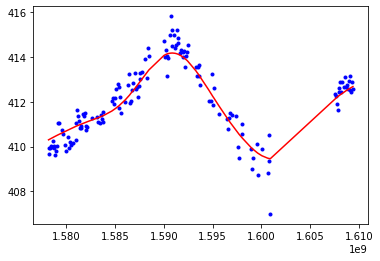

In [14]:
#### BEGIN 
#### yFIT test only
y = mpf.yfitdata(data)
x=data['tepoch']
print(y.shape)
ax0=plt.subplot(1,1,1)
ax0.plot(dset['tepoch'],dset['xco2avg'],'b.')
#ax0.plot(x,y,'k-')
ax0.plot(dset['tepoch'],dset['yfitavg'],'r-')
plt.show()
#### END 

In [ ]:
if testwithdset == 1:
    tmintest=(datetime.datetime(2020,4,10,0,0,0)-to).total_seconds()
    tmaxtest=(datetime.datetime(2020,4,12,0,0,0)-to).total_seconds()
    masktest = (tmintest <= data['tepoch']) & (tmaxtest >= data['tepoch'])
    datarowminus1 = 14
    print(dset['xCO2altz'][datarowminus1],dset['psurfaltz'][datarowminus1])
    datatest = copy.copy(data[masktest])
    datatest[name] = (datatest[name]*datatest[psurf] - dset['xCO2altz'][datarowminus1]*dset['psurfaltz'][datarowminus1])/(datatest[psurf]-dset['psurfaltz'][datarowminus1])
    print(datatest[name].shape)
    print(datos[name][masktest].shape)
    np.array_equal(datatest[name],datos[name][masktest])

In [25]:
datemin = datetime.datetime(2020,4,1,0,0,0)
datemax = datetime.datetime(2020,4,30,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()

matrix1,stdmat1,errmat1=mpf.matrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
matrix2,stdmat2,errmat2=mpf.matrixforinterval(tmin,tmax,datos,lats,lons,name,footprintradio)
matrixc,stdmatc,errmatc=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
mdiff = matrix2 - matrixc
stddiff = stdmat2 - stdmatc
errdiff = errmat2 - errmatc
#np.save('matrixDelta0605',matrix)

In [16]:
datemin = datetime.datetime(2020,1,1,0,0,0)
datemax = datetime.datetime(2020,4,30,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()
tmt0 = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
matrixc,stdmatc,errmatc=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
datemin = datetime.datetime(2020,5,1,0,0,0)
datemax = datetime.datetime(2020,8,31,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()
tmt1 = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
matrixc1,stdmatc1,errmatc1=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
datemin = datetime.datetime(2020,9,1,0,0,0)
datemax = datetime.datetime(2020,12,31,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()
tmt2 = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
matrixc2,stdmatc2,errmatc2=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)

d:\gitCCA\cca-jupyter\py\mapper_functions.py:634: RuntimeWarning: invalid value encountered in true_divide
  errmatrix=stdmatrix/np.sqrt(countermatrix)


In [20]:
filtermatrix1 = psurfmat
filtervalue1 = 639.25
filtermatrix2 = psurfmat 
filtervalue2 = 639.25
filtermatrix3 = psurfmat 
filtervalue3 = 639.25
matrix1f=np.where(filtermatrix1>filtervalue1,matrix1,np.nan)
matrix2f=np.where(filtermatrix2>filtervalue2,matrix2,np.nan)
matrixcf=np.where(filtermatrix3>filtervalue3,matrixc,np.nan)
stdmat1f=np.where(filtermatrix1>filtervalue1,stdmat1,np.nan)
stdmat2f=np.where(filtermatrix2>filtervalue2,stdmat2,np.nan)
stdmatcf=np.where(filtermatrix3>filtervalue3,stdmatc,np.nan)
errmat1f=np.where(filtermatrix1>filtervalue1,errmat1,np.nan)
errmat2f=np.where(filtermatrix2>filtervalue2,errmat2,np.nan)
errmatcf=np.where(filtermatrix3>filtervalue3,errmatc,np.nan)

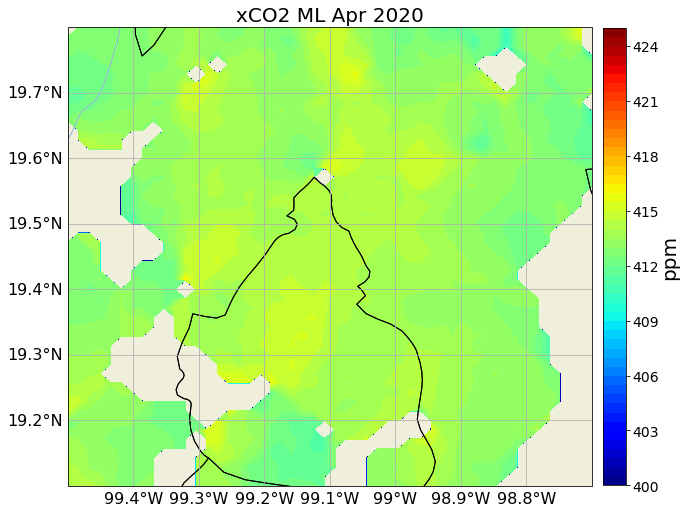

In [26]:
tyr= datemin.strftime("%Y")
if datemin.strftime("%b") == datemax.strftime("%b"):
    tmt= datemin.strftime("%b") + " "
else:
    tmt = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
tdy=''
mldxco2 = 'P_surf_Avg '
title1 = 'xCO2 ML ' + tmt + tdy + tyr
title2 = 'xCO2 ML ' + tmt + tdy + tyr
title3 = 'xCO2 ML ' + tmt + tdy + tyr
title8 = 'Std Dev ' + tmt + tdy + tyr
title4 = 'Std Dev ' + tmt + tdy + tyr
title7 = 'Std Dev ' + mldxco2 + tmt + tdy + tyr
title5 = 'Std Error ' + tmt + tdy + tyr
title6 = 'Std Error ' + tmt + tdy + tyr
title9 = 'Std Error ' + mldxco2 + tmt + tdy + tyr

lvls1 = np.arange(400,425.5,0.5)
lvls2 = np.arange(400,441,.5)
lvls3 = np.arange(400,441,.5)
lvls8 = np.arange(0,31,1)
lvls4 = np.arange(0,31,1)
lvls7 = np.arange(0,31,1)
lvls5 = np.arange(0,15.5,0.5)
lvls6 = np.arange(0,15.5,0.5)
lvls9 = np.arange(0,15.5,0.5)

titles = [title1,title2,title3,title4,title5,title6,title7,title8,title9]
matrices = [matrix1,matrixc1,matrixc2,stdmatc,errmat1,errmatc,errdiff,mdiff,stddiff]
matricesf = [matrix1f,matrix2f,matrixcf,stdmat1f,stdmat2f,stdmatcf,errmat1f,errmat2f,errmatcf]
lvls = [lvls1,lvls2,lvls3,lvls4,lvls5,lvls6,lvls7,lvls8,lvls9]


# Creates the map
mpf.mappernxm(latmin,latmax,lonmin,lonmax,lons,lats,rows,cols,titles,fontsize,ticksize,lvls,matrices,figname,savefig,cbarname)

In [ ]:
months = np.arange(1,13)
monthmats = []
monthstdmats = []
montherrmats = []
monthtitles = []
monthlvls = []
for ele in months:
    lastday=monthrange(2020,ele)
    datemin = datetime.datetime(2020,ele,1)
    datemax = datetime.datetime(2020,ele,lastday[1],23,59,59)
    tmin=(datemin-to).total_seconds()
    tmax=(datemax-to).total_seconds()
    monthlvl = np.arange(0,25,1)
    monthtitle=''+datemin.strftime("%b")+' 2020'
    monthmat,monthstdmat,montherrmat=mpf.hourlymatrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
    monthmat=np.where(monthmat!=0,monthmat,np.nan)
    monthstdmat=np.where(monthstdmat!=0,monthstdmat,np.nan)
    montherrmat=np.where(montherrmat!=0,montherrmat,np.nan)
    monthmats.append(monthmat)
    monthstdmats.append(monthstdmat)
    montherrmats.append(montherrmat)
    monthtitles.append(monthtitle)
    monthlvls.append(monthlvl)

In [14]:
months = np.arange(1,13)
monthmats = []
monthtitles = []
monthlvls = []
for ele in months:
    lastday=monthrange(2020,ele)
    datemin = datetime.datetime(2020,ele,1)
    datemax = datetime.datetime(2020,ele,lastday[1],23,59,59)
    tmin=(datemin-to).total_seconds()
    tmax=(datemax-to).total_seconds()
    monthlvl = np.arange(0,96,1)
    monthtitle=''+datemin.strftime("%b")+' 2020'
    monthmat=mpf.countermatrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
    monthmat=np.where(monthmat!=0,monthmat,np.nan)
    monthmats.append(monthmat)
    monthtitles.append(monthtitle)
    monthlvls.append(monthlvl)

In [15]:
print(countermatrix)

NameError: name 'countermatrix' is not defined

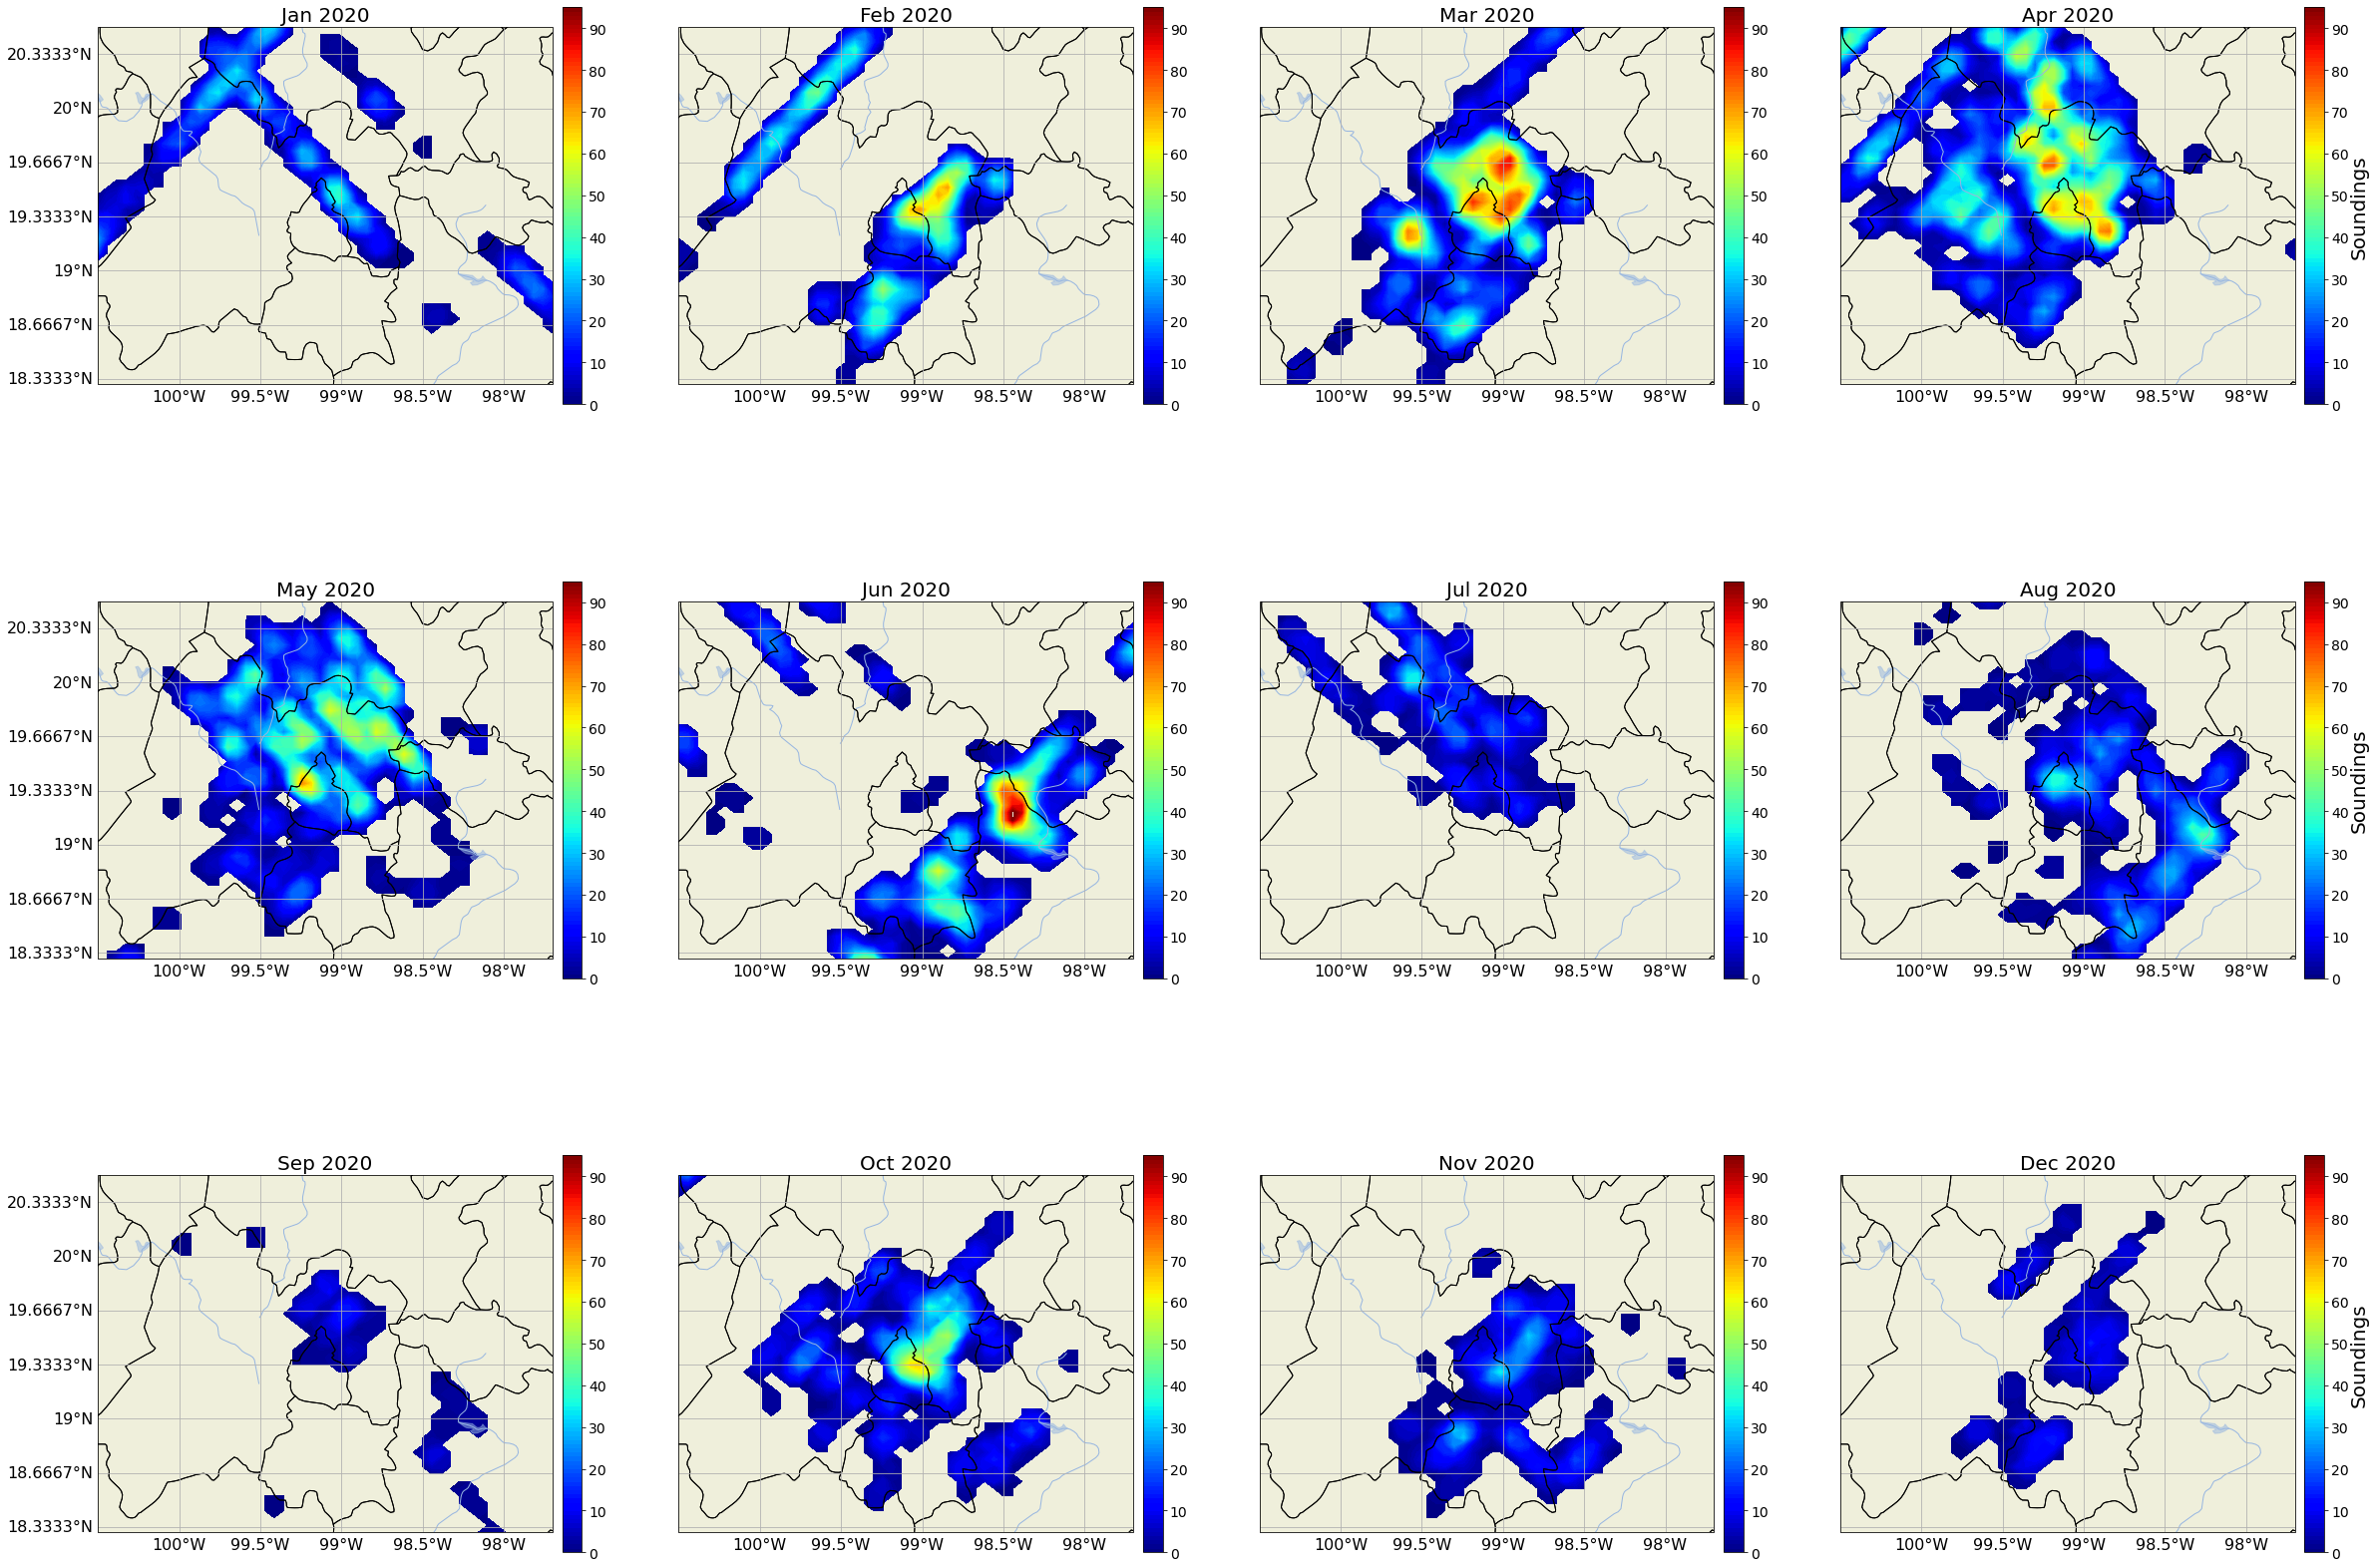

In [16]:
titles = monthtitles
matrices = monthmats
lvls = monthlvls


# Creates the map
mpf.mappernxm(latmin,latmax,lonmin,lonmax,lons,lats,rows,cols,titles,fontsize,ticksize,lvls,matrices,figname,savefig,cbarname)

In [ ]:
##########################################################################################################
#TESTING STARTS HERE

In [ ]:
print(datac.shape,datos.shape)

In [ ]:
np.array_equal(data[name],datac[name])

In [ ]:
print(matrixc)

In [ ]:
dset.close()
mset.close()

In [ ]:
dset2 = np.load('altzrefavg.npz', 'r')
t0 = datetime.datetime.utcfromtimestamp(0.0)
dsetepoch = np.array([(datetime.datetime(year=2020,month=dset2['month'][i],day=dset2['day'][i]) - t0).total_seconds() for i,dum in enumerate(dset2['month'])])

In [ ]:
print(dsetepoch)

In [ ]:
timestamp=copy.copy(data['tepoch'])
timerow1 = datetime.datetime.utcfromtimestamp(timestamp[0])
timerow1ymd = (datetime.datetime(year=timerow1.year,month=timerow1.month,day=timerow1.day) - t0).total_seconds()
if timerow1ymd in dsetepoch:
    print(timerow1.strftime("%b/%d-%H:%M")," match")
else:
    print(timerow1.strftime("%b/%d-%H:%M")," no match")
for i,ele in enumerate(timestamp):
    timerow2 = datetime.datetime.utcfromtimestamp(ele)
    timerow2ymd = (datetime.datetime(year=timerow2.year,month=timerow2.month,day=timerow2.day) - t0).total_seconds()
    if (timerow2.strftime("%b") == timerow1.strftime("%b")) & (timerow2.strftime("%d") == timerow1.strftime("%d")):
        pass
    else:
        if timerow2ymd in dsetepoch:
            print(timerow2.strftime("%b/%d-%H:%M")," match")
        else:
            print(timerow2.strftime("%b/%d-%H:%M")," no match")
    timerow1 = timerow2

In [ ]:
dset2.close()

In [ ]:
timestamp=copy.copy(data['tepoch'])
t0 = datetime.datetime.utcfromtimestamp(0.0)
timerow = datetime.datetime.utcfromtimestamp(timestamp[0])
timerowymd = (datetime.datetime(year=timerow.year,month=timerow.month,day=timerow.day) - t0).total_seconds()
daylist = [timerowymd,timerow.year,timerow.month,timerow.day]
print(daylist)
for i,ele in enumerate(timestamp):
    timerow = datetime.datetime.utcfromtimestamp(ele)
    timerowymd = (datetime.datetime(year=timerow.year,month=timerow.month,day=timerow.day) - t0).total_seconds()
    daylist_inter = [timerowymd,timerow.year,timerow.month,timerow.day]
    if timerowymd not in daylist:
        print(daylist_inter)
        daylist = np.vstack((daylist,daylist_inter))
    

In [ ]:
print(daylist.shape,daylist)

In [ ]:
tepoch = daylist[:,0].astype(int)
year = daylist[:,1].astype(int)
month = daylist[:,2].astype(int)
day = daylist[:,3].astype(int)
np.savez('targetdatadays',tepoch=tepoch,year=year,month=month,day=day)

In [ ]:
daset = np.load('targetdatadays.npz', 'r')
m = daset['tepoch']
for i, ele in enumerate(m):
    datarow = daset['tepoch'][i],daset['year'][i],daset['month'][i],daset['day'][i]
    print(datarow)

In [ ]:
daset.close()